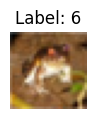

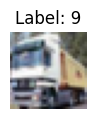

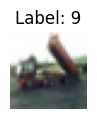

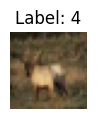

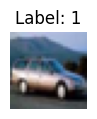

Epoch 1/2
625/625 [==============================] - 22s 34ms/step - loss: 1.9046 - accuracy: 0.3174 - val_loss: 1.7938 - val_accuracy: 0.3525
Epoch 2/2
625/625 [==============================] - 31s 50ms/step - loss: 1.6954 - accuracy: 0.3928 - val_loss: 1.6291 - val_accuracy: 0.4224


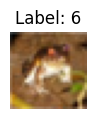

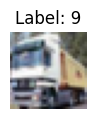

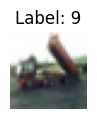

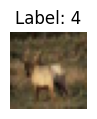

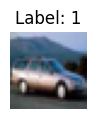

MLP Test Accuracy: 43.42%
Epoch 1/2
625/625 [==============================] - 61s 96ms/step - loss: 1.6537 - accuracy: 0.3915 - val_loss: 1.4884 - val_accuracy: 0.4596
Epoch 2/2
625/625 [==============================] - 52s 84ms/step - loss: 1.3148 - accuracy: 0.5278 - val_loss: 1.2202 - val_accuracy: 0.5690


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display a few images before model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
    plt.show()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=1)

# Display a few images after MLP model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=1)

# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

import time

# Define a list of optimizers to use
optimizers = ['adam', 'sgd', 'rmsprop']  # You can add more optimizers

# Initialize a list to store training times and accuracies
training_times = []
accuracies = []

for optimizer in optimizers:
    # Create a new CNN model with a distinct architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    cnn_model.add(Dense(10, activation='softmax'))
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Generate a bar plot to compare training times
plt.bar(optimizers, training_times)
plt.xlabel('Optimizers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison with Different Optimizers')
plt.show()

# Print accuracies achieved with different optimizers
for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

# Find and print the highest achieved accuracy
best_accuracy = max(accuracies)
print(f"Highest Accuracy Achieved: {best_accuracy * 100:.2f}%")


(50000, 32, 32, 3)
(50000, 10)
Epoch 1/2
625/625 [==============================] - 51s 78ms/step - loss: 1.6572 - accuracy: 0.3929 - val_loss: 1.3704 - val_accuracy: 0.5077
Epoch 2/2
625/625 [==============================] - 47s 75ms/step - loss: 1.2817 - accuracy: 0.5426 - val_loss: 1.1886 - val_accuracy: 0.5728
Epoch 1/2
625/625 [==============================] - 48s 76ms/step - loss: 1.6736 - accuracy: 0.3830 - val_loss: 1.4155 - val_accuracy: 0.4874
Epoch 2/2
625/625 [==============================] - 50s 79ms/step - loss: 1.3406 - accuracy: 0.5156 - val_loss: 1.2724 - val_accuracy: 0.5440
Epoch 1/2
625/625 [==============================] - 47s 74ms/step - loss: 1.6613 - accuracy: 0.3895 - val_loss: 1.5449 - val_accuracy: 0.4476
Epoch 2/2
625/625 [==============================] - 46s 73ms/step - loss: 1.3041 - accuracy: 0.5360 - val_loss: 1.2377 - val_accuracy: 0.5639


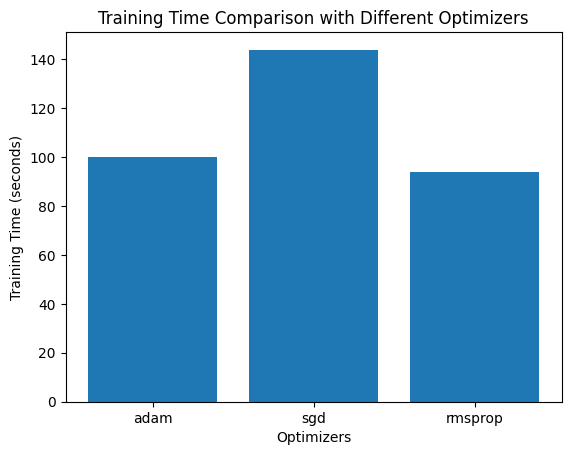

adam Optimizer - Test Accuracy: 57.50%
sgd Optimizer - Test Accuracy: 55.15%
rmsprop Optimizer - Test Accuracy: 56.39%
Highest Accuracy Achieved: 57.50%
